YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ADF Statistic: -19.897609275082317
p-value: 0.0
The series is stationary
                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                 1797
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -15028.624
Date:                Sun, 30 Mar 2025   AIC                          30069.247
Time:                        23:44:00   BIC                          30102.207
Sample:                    01-30-2019   HQIC                         30081.416
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0334      0.016     -2.037      0.042      -0.066      -0.001
ar.L2          0.0121      0.016      0.771      0.441    

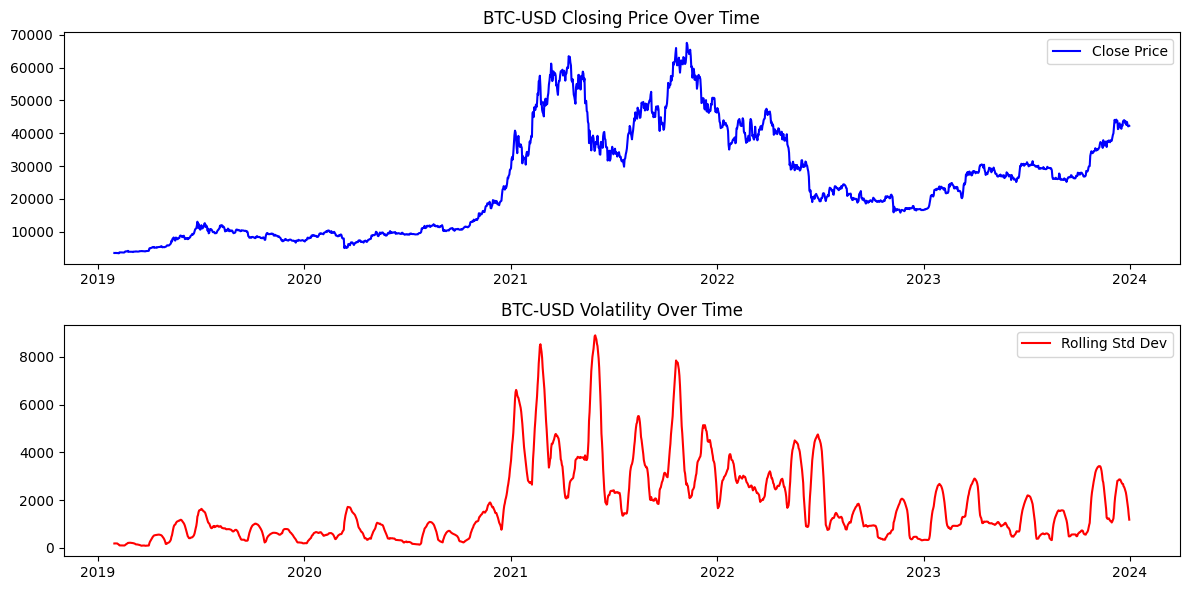

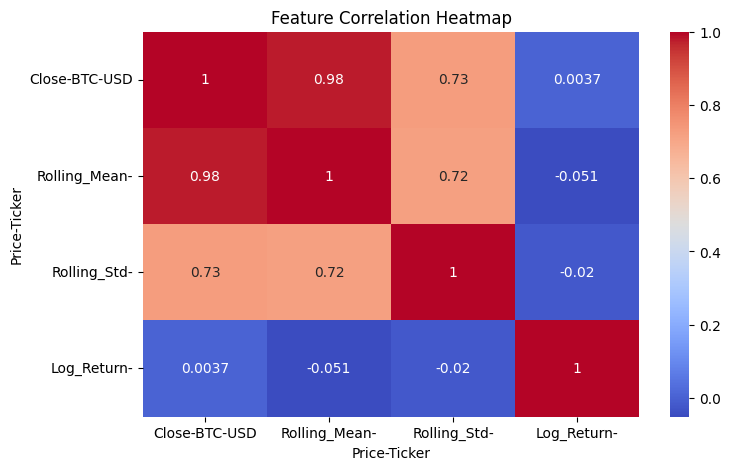

[*********************100%***********************]  1 of 1 completed
C:\Users\raksh\AppData\Roaming\Python\Python312\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
[                       0%                       ]

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
ADF Test Statistic: -20.118125527327514, p-value: 0.0
Phillips-Perron Test Statistic: -20.118125527327514, p-value: 0.0
Ljung-Box Test p-value: 0.0501067620772206
ARCH Test p-value: 5.4806308998850775e-05
Breusch-Godfrey Test p-value: 0.028788590853241255
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3593.62
Distribution:                  Normal   AIC:                          -7179.23
Method:            Maximum Likelihood   BIC:                          -7157.20
                                        No. Observations

[*********************100%***********************]  3 of 3 completed


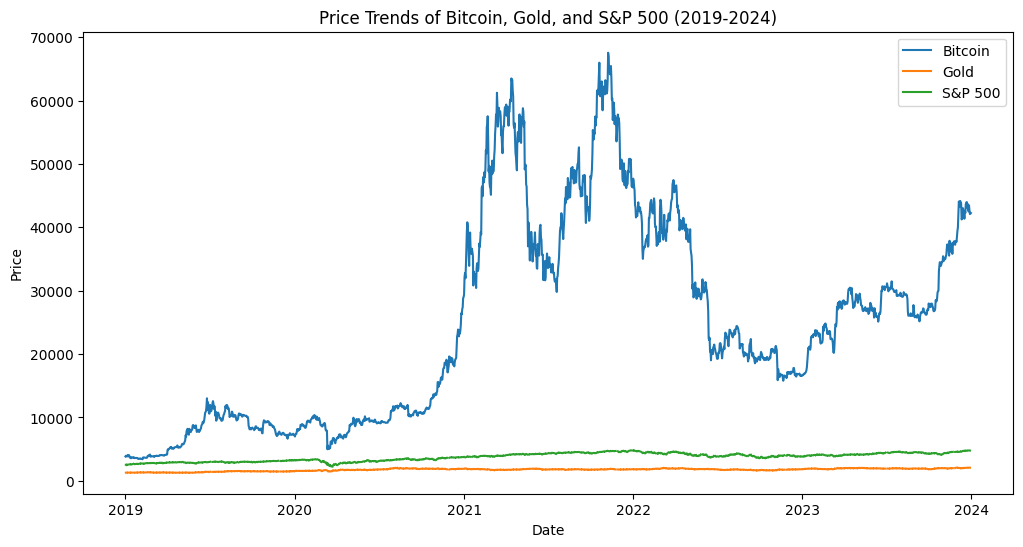

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
# Define the asset ticker and date range
ticker = "BTC-USD"  # Bitcoin ticker symbol on Yahoo Finance
start_date = "2019-01-01"
end_date = "2024-01-01"

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date)

# Feature Engineering
data['Return'] = data['Close'].pct_change()
data['Rolling_Mean'] = data['Close'].rolling(window=30).mean()
data['Rolling_Std'] = data['Close'].rolling(window=30).std()
data['Log_Return'] = np.log(1 + data['Return'])
data.dropna(inplace=True)

# Augmented Dickey-Fuller Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is non-stationary")
adf_test(data['Log_Return'])

# ARIMA Model for Forecasting
model_arima = ARIMA(data['Close'], order=(5,1,0))
result_arima = model_arima.fit()
print(result_arima.summary())

# GARCH Model for Volatility Forecasting
model_garch = arch_model(data['Log_Return']*100, vol='Garch', p=1, q=1)
result_garch = model_garch.fit(disp='off')
print(result_garch.summary())

# Data Visualization
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title(f'{ticker} Closing Price Over Time')
plt.legend()

plt.subplot(2,1,2)
plt.plot(data['Rolling_Std'], label='Rolling Std Dev', color='red')
plt.title(f'{ticker} Volatility Over Time')
plt.legend()
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data[['Close', 'Rolling_Mean', 'Rolling_Std', 'Log_Return']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Save Data to CSV
data.to_csv(f"{ticker}_5yr_data_processed.csv")

import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

# Fetch Bitcoin data from Yahoo Finance (Jan 1, 2019 - Jan 1, 2024)
btc_data = yf.download('BTC-USD', start='2019-01-01', end='2024-01-01')

# Print column names to check structure
print(btc_data.columns)

# Use 'Close' instead of 'Adj Close' if necessary
if 'Adj Close' in btc_data.columns:
    close_price = btc_data['Adj Close']
elif 'Close' in btc_data.columns:
    close_price = btc_data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' column found in the dataset.")

# Compute Log Returns
btc_data['Log_Returns'] = np.log(close_price / close_price.shift(1))
btc_data.dropna(inplace=True)

# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(btc_data['Log_Returns'])
print(f'ADF Test Statistic: {adf_result[0]}, p-value: {adf_result[1]}')

# Phillips-Perron (PP) Test
pp_result = sm.tsa.stattools.adfuller(btc_data['Log_Returns'], regression='c', autolag='AIC')
print(f'Phillips-Perron Test Statistic: {pp_result[0]}, p-value: {pp_result[1]}')

# Ljung-Box Test (Autocorrelation)
ljung_box_result = acorr_ljungbox(btc_data['Log_Returns'], lags=[10], return_df=True)
print(f'Ljung-Box Test p-value: {ljung_box_result["lb_pvalue"].values[0]}')

# Engle’s ARCH Test (Volatility Clustering)
arch_test_result = het_arch(btc_data['Log_Returns'])
print(f'ARCH Test p-value: {arch_test_result[1]}')

# Breusch-Godfrey Test (Autocorrelation in Residuals)
bg_test = sm.stats.diagnostic.acorr_breusch_godfrey(sm.OLS(btc_data['Log_Returns'], sm.add_constant(range(len(btc_data)))).fit(), nlags=5)
print(f'Breusch-Godfrey Test p-value: {bg_test[1]}')

# GARCH Model for Volatility
garch_model = arch_model(btc_data['Log_Returns'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp="off")
print(garch_result.summary())

# Download data for Bitcoin, Gold, and S&P 500
assets = {'BTC-USD': 'Bitcoin', 'GC=F': 'Gold', '^GSPC': 'S&P 500'}
data = yf.download(list(assets.keys()), start='2019-01-01', end='2024-01-01')['Close']
data.rename(columns=assets, inplace=True)

# Log returns
returns = np.log(data / data.shift(1)).dropna()

# Visualizing price trends
plt.figure(figsize=(12,6))
for asset in data.columns:
    plt.plot(data.index, data[asset], label=asset)
plt.title('Price Trends of Bitcoin, Gold, and S&P 500 (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


